## Importing Library

In [1]:
# prediction
def check_correct(predict, y):
    result = {}
    result['cancer-correct'] = 0
    result['cancer-wrong'] = 0
    result['normal-correct'] = 0
    result['normal-wrong'] = 0

    for i in range(len(predict)) :
        if predict[i] == y[i] :
            if y[i] == 0 :
                result['normal-correct'] += 1
            else :
                result['cancer-correct'] += 1
        else :
            if y[i] == 0 :
                result['normal-wrong'] += 1
            else :
                result['cancer-wrong'] += 1

    for result_k, result_v in result.items():
        print(result_k +" : "+ str(result_v))
    sensitivity=result['cancer-correct']/(result['cancer-correct']+result['cancer-wrong'])
    specificity=result['normal-correct']/(result['normal-correct']+result['normal-wrong'])
    print("Sensitivity :", sensitivity)
    print("Specificity :", specificity)
    return sensitivity, specificity

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

Using TensorFlow backend.


1.5.0


## Import Data

In [57]:
path = "C://test/TC_intersect_subsamples/"
types = ["inter_OV_Var_200", "inter_OV_Annotation3000_100", 
         "inter_OV_CV_400", "inter_OV_new_Diff_400",
         "inter_OV_Clin", 
         "inter_OV_SNV_ch" 
         ]

file_1 = path+types[0]+".csv"
file_2 = path+types[1]+".csv"
file_3 = path+types[2]+".csv"
file_4 = path+types[3]+".csv"
file_5 = path+types[4]+".csv"
file_6 = path+types[5]+".csv"

idx_col = 0

data_1 = pd.read_csv(file_1,index_col=idx_col)
data_2 = pd.read_csv(file_2,index_col=idx_col)
data_3 = pd.read_csv(file_3,index_col=idx_col)
data_4 = pd.read_csv(file_4,index_col=idx_col)
data_5 = pd.read_csv(file_5,index_col=idx_col)
data_6 = pd.read_csv(file_6,index_col=idx_col)

sample_1,features_1 = data_1.shape
sample_2,features_2 = data_2.shape
sample_3,features_3 = data_3.shape
sample_4,features_4 = data_4.shape
sample_5,features_5 = data_5.shape
sample_6,features_6 = data_6.shape


[features_1, features_2, features_3, features_4, features_5, features_6] = [features_1-2, features_2-2, features_3-2, features_4-2, features_5-2, features_6-2]

print("[1] file_name: ", file_1, "\nsample : {}  \nfeatures : {}".format(sample_1,features_1))
print("[2] file_name: ", file_2, "\nsample : {}  \nfeatures : {}".format(sample_2,features_2))
print("[3] file_name: ", file_3, "\nsample : {}  \nfeatures : {}".format(sample_3,features_3))
print("[4] file_name: ", file_4, "\nsample : {}  \nfeatures : {}".format(sample_4,features_4))
print("[5] file_name: ", file_5, "\nsample : {}  \nfeatures : {}".format(sample_5,features_5))
print("[6] file_name: ", file_6, "\nsample : {}  \nfeatures : {}".format(sample_6,features_6))


[1] file_name:  C://test/TC_intersect_subsamples/inter_OV_Var_200.csv 
sample : 196  
features : 200
[2] file_name:  C://test/TC_intersect_subsamples/inter_OV_Annotation3000_100.csv 
sample : 196  
features : 100
[3] file_name:  C://test/TC_intersect_subsamples/inter_OV_CV_400.csv 
sample : 196  
features : 400
[4] file_name:  C://test/TC_intersect_subsamples/inter_OV_new_Diff_400.csv 
sample : 196  
features : 400
[5] file_name:  C://test/TC_intersect_subsamples/inter_OV_Clin.csv 
sample : 196  
features : 35
[6] file_name:  C://test/TC_intersect_subsamples/inter_OV_SNV_ch.csv 
sample : 196  
features : 282


## Split Train Test Data

In [61]:
train_data_1 = data_1.iloc[list(data_1.iloc[:,-1]!=1)]
test_data_1 = data_1.iloc[list(data_1.iloc[:,-1]==1)]

y_val_1 = train_data_1.Platinum_Status
x_val_1 = train_data_1.drop(["Platinum_Status","index"],axis=1)
test_y_val_1 = test_data_1.Platinum_Status
test_x_val_1 = test_data_1.drop(["Platinum_Status","index"],axis=1)

print(x_val_1.shape, test_x_val_1.shape)

(156, 200) (40, 200)


In [62]:
train_data_2 = data_2.iloc[list(data_2.iloc[:,-1]!=1)]
test_data_2 = data_2.iloc[list(data_2.iloc[:,-1]==1)]

y_val_2 = train_data_2.Platinum_Status
x_val_2 = train_data_2.drop(["Platinum_Status","index"],axis=1)
test_y_val_2 = test_data_2.Platinum_Status
test_x_val_2 = test_data_2.drop(["Platinum_Status","index"],axis=1)

print(x_val_2.shape, test_x_val_2.shape)

(156, 100) (40, 100)


In [55]:
train_data_3 = data_3.iloc[list(data_3.iloc[:,-1]!=1)]
test_data_3 = data_3.iloc[list(data_3.iloc[:,-1]==1)]

y_val_3 = train_data_3.Platinum_Status
x_val_3 = train_data_3.drop(["Platinum_Status","index"],axis=1)
test_y_val_3 = test_data_3.Platinum_Status
test_x_val_3 = test_data_3.drop(["Platinum_Status","index"],axis=1)

print(x_val_3.shape, test_x_val_3.shape)

(156, 402) (40, 402)


'\ntrain_data_4,test_data_4 = train_test_split(data_4, test_size=0.2)\ny_val_4 = train_data_4.Platinum_Status\nx_val_4 = train_data_4.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_4 = test_data_4.Platinum_Status\ntest_x_val_4 = test_data_4.drop(["Platinum_Status","index"],axis=1)\n\ntrain_data_5,test_data_5 = train_test_split(data_5, test_size=0.2)\ny_val_5 = train_data_5.Platinum_Status\nx_val_5 = train_data_5.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_5 = test_data_5.Platinum_Status\ntest_x_val_5 = test_data_5.drop(["Platinum_Status","index"],axis=1)\n\ntrain_data_6,test_data_6 = train_test_split(data_6, test_size=0.2)\ny_val_6 = train_data_6.Platinum_Status\nx_val_6 = train_data_6.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_6 = test_data_6.Platinum_Status\ntest_x_val_6 = test_data_6.drop(["Platinum_Status","index"],axis=1)\n'

In [63]:
train_data_4 = data_4.iloc[list(data_4.iloc[:,-1]!=1)]
test_data_4 = data_4.iloc[list(data_4.iloc[:,-1]==1)]

y_val_4 = train_data_4.Platinum_Status
x_val_4 = train_data_4.drop(["Platinum_Status","index"],axis=1)
test_y_val_4 = test_data_4.Platinum_Status
test_x_val_4 = test_data_4.drop(["Platinum_Status","index"],axis=1)

print(x_val_4.shape, test_x_val_4.shape)

(156, 400) (40, 400)


In [64]:
train_data_5 = data_5.iloc[list(data_5.iloc[:,-1]!=1)]
test_data_5 = data_5.iloc[list(data_5.iloc[:,-1]==1)]

y_val_5 = train_data_5.Platinum_Status
x_val_5 = train_data_5.drop(["Platinum_Status","index"],axis=1)
test_y_val_5 = test_data_5.Platinum_Status
test_x_val_5 = test_data_5.drop(["Platinum_Status","index"],axis=1)

print(x_val_5.shape, test_x_val_5.shape)

(156, 35) (40, 35)


In [65]:
train_data_6 = data_6.iloc[list(data_6.iloc[:,-1]!=1)]
test_data_6 = data_6.iloc[list(data_6.iloc[:,-1]==1)]

y_val_6 = train_data_6.Platinum_Status
x_val_6 = train_data_6.drop(["Platinum_Status","index"],axis=1)
test_y_val_6 = test_data_6.Platinum_Status
test_x_val_6 = test_data_6.drop(["Platinum_Status","index"],axis=1)

print(x_val_6.shape, test_x_val_6.shape)

(156, 282) (40, 282)


## Modeling Seperate Model

###  Building seperate model for ensemble(model 1, 2, 3)

In [67]:
from keras.layers import Input, Dense
from keras.models import Model

print(features_1, features_2, features_3, features_4, features_5, features_6)

200 100 400 400 35 282


In [79]:
keep_prob_1 = 0.5

m1 = Sequential()
m1.add(Dense(features_1, input_dim = features_1, activation='relu', init='glorot_uniform'))

for i in [100, 300, 200, 100]:
    m1.add(Dropout(keep_prob_1))
    m1.add(Dense(i, activation='relu'))

m1.add(Dropout(keep_prob))
m1.add(Dense(1, activation='sigmoid'))

m1.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

m1.fit(x_val_1, y_val_1, epochs=13, batch_size=10, callbacks=[early_stopping])
m1.save("m1.h5")

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", input_dim=200, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


Epoch 1/13
156/156 [==============================] - 1s 5ms/step - loss: 1.0079 - acc: 0.4679
Epoch 2/13
156/156 [==============================] - 0s 971us/step - loss: 0.8812 - acc: 0.4872
Epoch 3/13
 10/156 [>.............................] - ETA: 0s - loss: 0.5891 - acc: 0.7000

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


156/156 [==============================] - 0s 948us/step - loss: 0.7549 - acc: 0.5385
Epoch 4/13
156/156 [==============================] - 0s 802us/step - loss: 0.8273 - acc: 0.4679
Epoch 5/13
156/156 [==============================] - 0s 788us/step - loss: 0.7209 - acc: 0.5769
Epoch 6/13
156/156 [==============================] - 0s 813us/step - loss: 0.7346 - acc: 0.5513
Epoch 7/13
156/156 [==============================] - 0s 856us/step - loss: 0.7119 - acc: 0.5705
Epoch 8/13
156/156 [==============================] - 0s 768us/step - loss: 0.7317 - acc: 0.5064
Epoch 9/13
156/156 [==============================] - 0s 756us/step - loss: 0.7265 - acc: 0.5385
Epoch 10/13
156/156 [==============================] - 0s 830us/step - loss: 0.7373 - acc: 0.5000
Epoch 11/13
156/156 [==============================] - 0s 819us/step - loss: 0.7691 - acc: 0.5321
Epoch 12/13
156/156 [==============================] - 0s 830us/step - loss: 0.7053 - acc: 0.5000
Epoch 13/13
156/156 [=================

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [9]:





keep_prob = 0.5

input_m1 = Input(shape=(features_1-2,))
input_drop_m1 = Dropout(keep_prob)(input_m1)
h1_m1 = Dense(150,activation='relu')(input_drop_m1)
h1_m1 = Dropout(keep_prob)(h1_m1)
h2_m1 = Dense(200,activation='relu')(h1_m1)
h2_m1 = Dropout(keep_prob)(h2_m1)
h3_m1 = Dense(300,activation='relu')(h2_m1) 
h3_m1 = Dropout(keep_prob)(h3_m1)
h4_m1 = Dense(150,activation='relu')(h3_m1) 
h4_m1 = Dropout(keep_prob)(h4_m1)
output_m1 = Dense(1,activation="sigmoid")(h4_m1) 
model1 = Model(inputs=input_m1,outputs=output_m1)

input_m2 = Input(shape=(features_2-2,))
input_drop_m2 = Dropout(keep_prob)(input_m2)
h1_m2 = Dense(150,activation='relu')(input_drop_m2)
h1_m2 = Dropout(keep_prob)(h1_m2)
h2_m2 = Dense(200,activation='relu')(h1_m2)
h2_m2 = Dropout(keep_prob)(h2_m2)
h3_m2 = Dense(250,activation='relu')(h2_m2)
h3_m2 = Dropout(keep_prob)(h3_m2)
#h4_m2 = Dense(10,activation='relu')(h3_m2)
h4_m2 = h3_m2
#h4_m2 = Dropout(keep_prob)(h4_m2)
output_m2 = Dense(1,activation="sigmoid")(h4_m2)
model2 = Model(inputs=input_m2,outputs=output_m2)

input_m3 = Input(shape=(features_3-2,))
input_drop_m3 = Dropout(keep_prob)(input_m3)
h1_m3 = Dense(200,activation='relu')(input_drop_m3)
h1_m3 = Dropout(keep_prob)(h1_m3)
h2_m3 = Dense(200,activation='relu')(h1_m3)
h2_m3 = Dropout(keep_prob)(h2_m3)
h3_m3 = Dense(200,activation='relu')(h2_m3)
h3_m3 = Dropout(keep_prob)(h3_m3)
h4_m3 = h3_m3
output_m3 = Dense(1,activation="sigmoid")(h4_m3)
model3 = Model(inputs=input_m3,outputs=output_m3)

'''
input_m4 = Input(shape=(features_4-2,))
h1_m4 = Dense(150,activation='relu')(input_m4)
h2_m4 = Dense(200,activation='relu')(h1_m4) 
h3_m4 = Dense(200,activation='relu')(h2_m4) 
h4_m4 = Dense(150,activation='relu')(h3_m4) 
output_m4 = Dense(1,activation="sigmoid")(h4_m4) 
model4 = Model(inputs=input_m4,outputs=output_m4)

input_m5 = Input(shape=(features_5-2,))
h1_m5 = Dense(250,activation='relu')(input_m5)
h2_m5 = Dense(100,activation='relu')(h1_m5) 
h3_m5 = Dense(30,activation='relu')(h2_m5)
h4_m5 = Dense(10,activation='relu')(h3_m5) 
output_m5 = Dense(1,activation="sigmoid")(h4_m5)
model5 = Model(inputs=input_m5,outputs=output_m5)

input_m6 = Input(shape=(features_6-2,))
h1_m6 = Dense(200,activation='relu')(input_m6)
h2_m6 = Dense(100,activation='relu')(h1_m6) 
h3_m6 = Dense(100,activation='relu')(h2_m6)
h4_m6 = Dense(10,activation='relu')(h3_m6) 
output_m6 = Dense(1,activation="sigmoid")(h4_m6)
model6 = Model(inputs=input_m6,outputs=output_m6)
'''

'''m1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model1.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model6.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
#m1.fit(x_val_1, y_val_1, epochs=13, batch_size=10)
print(early_stopping)
model1.fit(x_val_1, y_val_1, epochs=13, batch_size=10, callbacks=[early_stopping])
model2.fit(x_val_2, y_val_2, epochs=13, batch_size=5, callbacks=[early_stopping])
model3.fit(x_val_3, y_val_3, epochs=13, batch_size=5, callbacks=[early_stopping])
'''
model4.fit(x_val_4, y_val_4, epochs=13)
model5.fit(x_val_5, y_val_5, epochs=13)
model6.fit(x_val_6, y_val_6, epochs=13)
'''

Epoch 1/13
156/156 [==============================] - 1s 9ms/step - loss: 0.7718 - acc: 0.4936
Epoch 2/13


c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: acc,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


156/156 [==============================] - 0s 2ms/step - loss: 0.7279 - acc: 0.5000
Epoch 3/13
156/156 [==============================] - 0s 1ms/step - loss: 0.7576 - acc: 0.4808
Epoch 4/13
156/156 [==============================] - 0s 2ms/step - loss: 0.6959 - acc: 0.5256
Epoch 5/13
156/156 [==============================] - 0s 1ms/step - loss: 0.7014 - acc: 0.5769
Epoch 6/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6774 - acc: 0.5833
Epoch 7/13
156/156 [==============================] - 0s 956us/step - loss: 0.6762 - acc: 0.5769
Epoch 8/13
156/156 [==============================] - 0s 1ms/step - loss: 0.7193 - acc: 0.5769
Epoch 9/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6808 - acc: 0.5449
Epoch 10/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6431 - acc: 0.6282
Epoch 11/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6382 - acc: 0.6410
Epoch 12/13
156/156 [==============================] - 0s

'\nmodel4.fit(x_val_4, y_val_4, epochs=13)\nmodel5.fit(x_val_5, y_val_5, epochs=13)\nmodel6.fit(x_val_6, y_val_6, epochs=13)\n'

In [85]:
from keras.models import model_from_json

# serialize model to JSON
model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
# later...
 
# load json and create model
json_file1 = open('model1.json', 'r')
loaded_model_json1 = json_file1.read()
json_file1.close()
loaded_model1 = model_from_json(loaded_model_json1)
# load weights into new model
loaded_model1.load_weights("model1.h5")

### Evaluating seperate model's performance

In [13]:
#model1_new=loaded_model1
#model1_new.compile(optimizer=tf.train.AdamOptimizer(), 
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

m1_tr_loss,m1_tr_accuracy=model1.evaluate(x_val_1,y_val_1)
m2_tr_loss,m2_tr_accuracy=model2.evaluate(x_val_2,y_val_2)
m3_tr_loss,m3_tr_accuracy=model3.evaluate(x_val_3,y_val_3)

m1_loss,m1_accuracy= model1.evaluate(test_x_val_1,test_y_val_1)
m2_loss,m2_accuracy= model2.evaluate(test_x_val_2,test_y_val_2)
m3_loss,m3_accuracy= model3.evaluate(test_x_val_3,test_y_val_3)

#m1_tr_loss_new,m1_tr_accuracy_new=model1_new.evaluate(x_val_1,y_val_1)
#m1_loss_new,m1_accuracy_new= model1_new.evaluate(test_x_val_1,test_y_val_1)

print(file_1,file_2,file_3)
print("\nTrain Accuracy for model 1, 2, 3 : {},{},{}".format(m1_tr_accuracy,m2_tr_accuracy,m3_tr_accuracy))
print("\nTest Accuracy for model 1, 2, 3 : {},{},{}".format(m1_accuracy,m2_accuracy,m3_accuracy))

40/40 [==============================] - 0s 480us/step
C://test/TC_intersect_subsamples/inter_OV_CV_400.csv C://test/TC_intersect_subsamples/inter_OV_Clin.csv C://test/TC_intersect_subsamples/inter_OV_SNV_ch.csv

Train Accuracy for model 1, 2, 3 : 0.8205128174561721,0.7499999954150274,0.9294871779588553

Test Accuracy for model 1, 2, 3 : 0.575,0.625,0.575


## Modeling Ensemble model

### Building original ensemble model

In [14]:
m1_predictions = model1.predict(x_val_1)
m2_predictions = model2.predict(x_val_2)
m3_predictions = model3.predict(x_val_3)

ensemble_x_val = np.concatenate([m1_predictions, m2_predictions, m3_predictions], axis=1)

ensemble_model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),name="input_layer"),
    keras.layers.Dense(2,activation="relu"),        
    keras.layers.Dense(1,activation='sigmoid',name="output_layer")])

ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ensemble_model.fit(ensemble_x_val, y_val_1, epochs=5, batch_size= 1)


[[0.61387694]
 [0.2791472 ]
 [0.587619  ]
 [0.62159365]
 [0.5299795 ]
 [0.48753676]
 [0.44699344]
 [0.41624078]
 [0.40831476]
 [0.36715665]
 [0.37325436]
 [0.41579792]
 [0.41022357]
 [0.3028223 ]
 [0.3871858 ]
 [0.44115305]
 [0.3818252 ]
 [0.4963078 ]
 [0.54422545]
 [0.44848093]
 [0.55933636]
 [0.41484404]
 [0.3118703 ]
 [0.4348281 ]
 [0.4114312 ]
 [0.38410565]
 [0.28912583]
 [0.5131408 ]
 [0.458787  ]
 [0.4721161 ]
 [0.5380538 ]
 [0.44413647]
 [0.60147196]
 [0.23819533]
 [0.45228004]
 [0.49882427]
 [0.46496126]
 [0.50566006]
 [0.54888207]
 [0.31897572]
 [0.334885  ]
 [0.49782133]
 [0.4936863 ]
 [0.42408317]
 [0.4133823 ]
 [0.46844485]
 [0.2764286 ]
 [0.29509088]
 [0.2755778 ]
 [0.34684584]
 [0.4041901 ]
 [0.4902683 ]
 [0.39915594]
 [0.18159267]
 [0.39067832]
 [0.52510005]
 [0.41682646]
 [0.47121006]
 [0.43468136]
 [0.32362244]
 [0.44482115]
 [0.30899298]
 [0.42513037]
 [0.22333   ]
 [0.25030226]
 [0.43546695]
 [0.31937417]
 [0.20432642]
 [0.48939592]
 [0.5208191 ]
 [0.4165901 ]
 [0.50

### Evaluating _DNN Combiner_ ensemble model

In [16]:
m1_test_predictions = model1.predict(test_x_val_1)
m2_test_predictions = model2.predict(test_x_val_2)
m3_test_predictions = model3.predict(test_x_val_3)

ensemble_test_x_val = np.concatenate([m1_test_predictions, m2_test_predictions, m3_test_predictions], axis=1)

em_loss,em_accuracy= ensemble_model.evaluate(ensemble_test_x_val,test_y_val_1)

print("Accuracy for DNN combiner ensemble : {}".format(em_accuracy))

40/40 [==============================]40/40 [==============================] - 0s 97us/step

Accuracy for DNN combiner ensemble : 0.55


### Evaluating _mean_ ensemble model

In [17]:
mean_predictions=(m1_test_predictions+m2_test_predictions+m3_test_predictions)/3
labled_predictions = np.where(mean_predictions > 0.5, 1, 0).flatten()
mean_em_accuracy = sum(labled_predictions==test_y_val_1.values)/len(test_y_val_1)

print("Accuracy for mean ensemble : {}".format(mean_em_accuracy))

Accuracy for mean ensemble : 0.425


## Transferred Ensemble Modeling 

### Making new input data for t-ensemble

In [18]:
from keras.models import Model
model = Model(inputs=[input_m1], outputs=[h4_m1])
results_m1 = model.predict([x_val_1])

model = Model(inputs=[input_m2], outputs=[h4_m2])
results_m2 = model.predict([x_val_2])

model = Model(inputs=[input_m3], outputs=[h4_m3])
results_m3 = model.predict([x_val_3])

t_ensemble_x_val = np.concatenate([results_m1, results_m2, results_m3], axis=1)
print(t_ensemble_x_val.shape)

(156, 600)


### Modeling t-ensemble  

In [19]:
t_ensemble_input = Input(shape=(t_ensemble_x_val.shape[1],))
t_ensemble_h1 = Dense(20,activation='relu')(t_ensemble_input)
t_ensemble_h2 = Dense(10,activation='relu')(t_ensemble_h1)
t_ensemble_h3 = Dense(5,activation='relu')(t_ensemble_h2)
t_ensemble_output = Dense(1,activation='sigmoid')(t_ensemble_h3)

t_ensemble_model = Model(inputs=[t_ensemble_input],outputs=[t_ensemble_output])
t_ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

t_ensemble_model.fit(t_ensemble_x_val, y_val_1, epochs=2,batch_size=5)

Epoch 1/2
156/156 [==============================] - 1s 5ms/step - loss: 0.6908 - acc: 0.5385
Epoch 2/2
156/156 [==============================] - 0s 1ms/step - loss: 0.6525 - acc: 0.7051


### Evaluating t-ensemble

In [20]:
model = Model(inputs=[input_m1], outputs=[h4_m1])
test_results_m1 = model.predict([test_x_val_1])
model = Model(inputs=[input_m2], outputs=[h4_m2])
test_results_m2 = model.predict([test_x_val_2])
model = Model(inputs=[input_m3], outputs=[h4_m3])
test_results_m3 = model.predict([test_x_val_3])

t_ensemble_test_x_val = np.concatenate([test_results_m1, test_results_m2, test_results_m3], axis=1)
t_em_accuracy = t_ensemble_model.evaluate(t_ensemble_test_x_val,test_y_val_1)[1]
print("\nAccuracy for t-ensemble: ",t_em_accuracy )

40/40 [==============================] - 0s 4ms/step

Accuracy for t-ensemble:  0.55


## Performance Comparison

In [21]:
label = ["model1","model2","model3","mean-em","d-comb em","t-em"]
accuracy = [m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy ]
print("model1: "+str(accuracy[0])+"\nmodel2: "+str(accuracy[1])+"\nmodel3: "+str(accuracy[2])+"\nmean-em: "+str(accuracy[3])+"\nd-comb em: "+str(accuracy[4])+"\nt-em: "+str(accuracy[5]))

model1: 0.575
model2: 0.625
model3: 0.575
mean-em: 0.425
d-comb em: 0.55
t-em: 0.55


In [22]:
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(30,20))
    axes = plt.gca()
    axes.set_ylim([min(m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy)-0.02,1])
    index = np.arange(len(label))
    plt.bar(index, accuracy,color=['red', 'orange', 'yellow', "green",'blue', 'purple',],alpha=0.5,width=0.3)
    plt.xlabel('Method', fontsize=35)
    plt.ylabel('Accuracy', fontsize=35)
    plt.yticks(fontsize=30)    
    plt.xticks(index, label, fontsize=30, rotation=90)
    plt.title('Performance Comparison for each Ensemble Model',fontsize=40)
    plt.show()

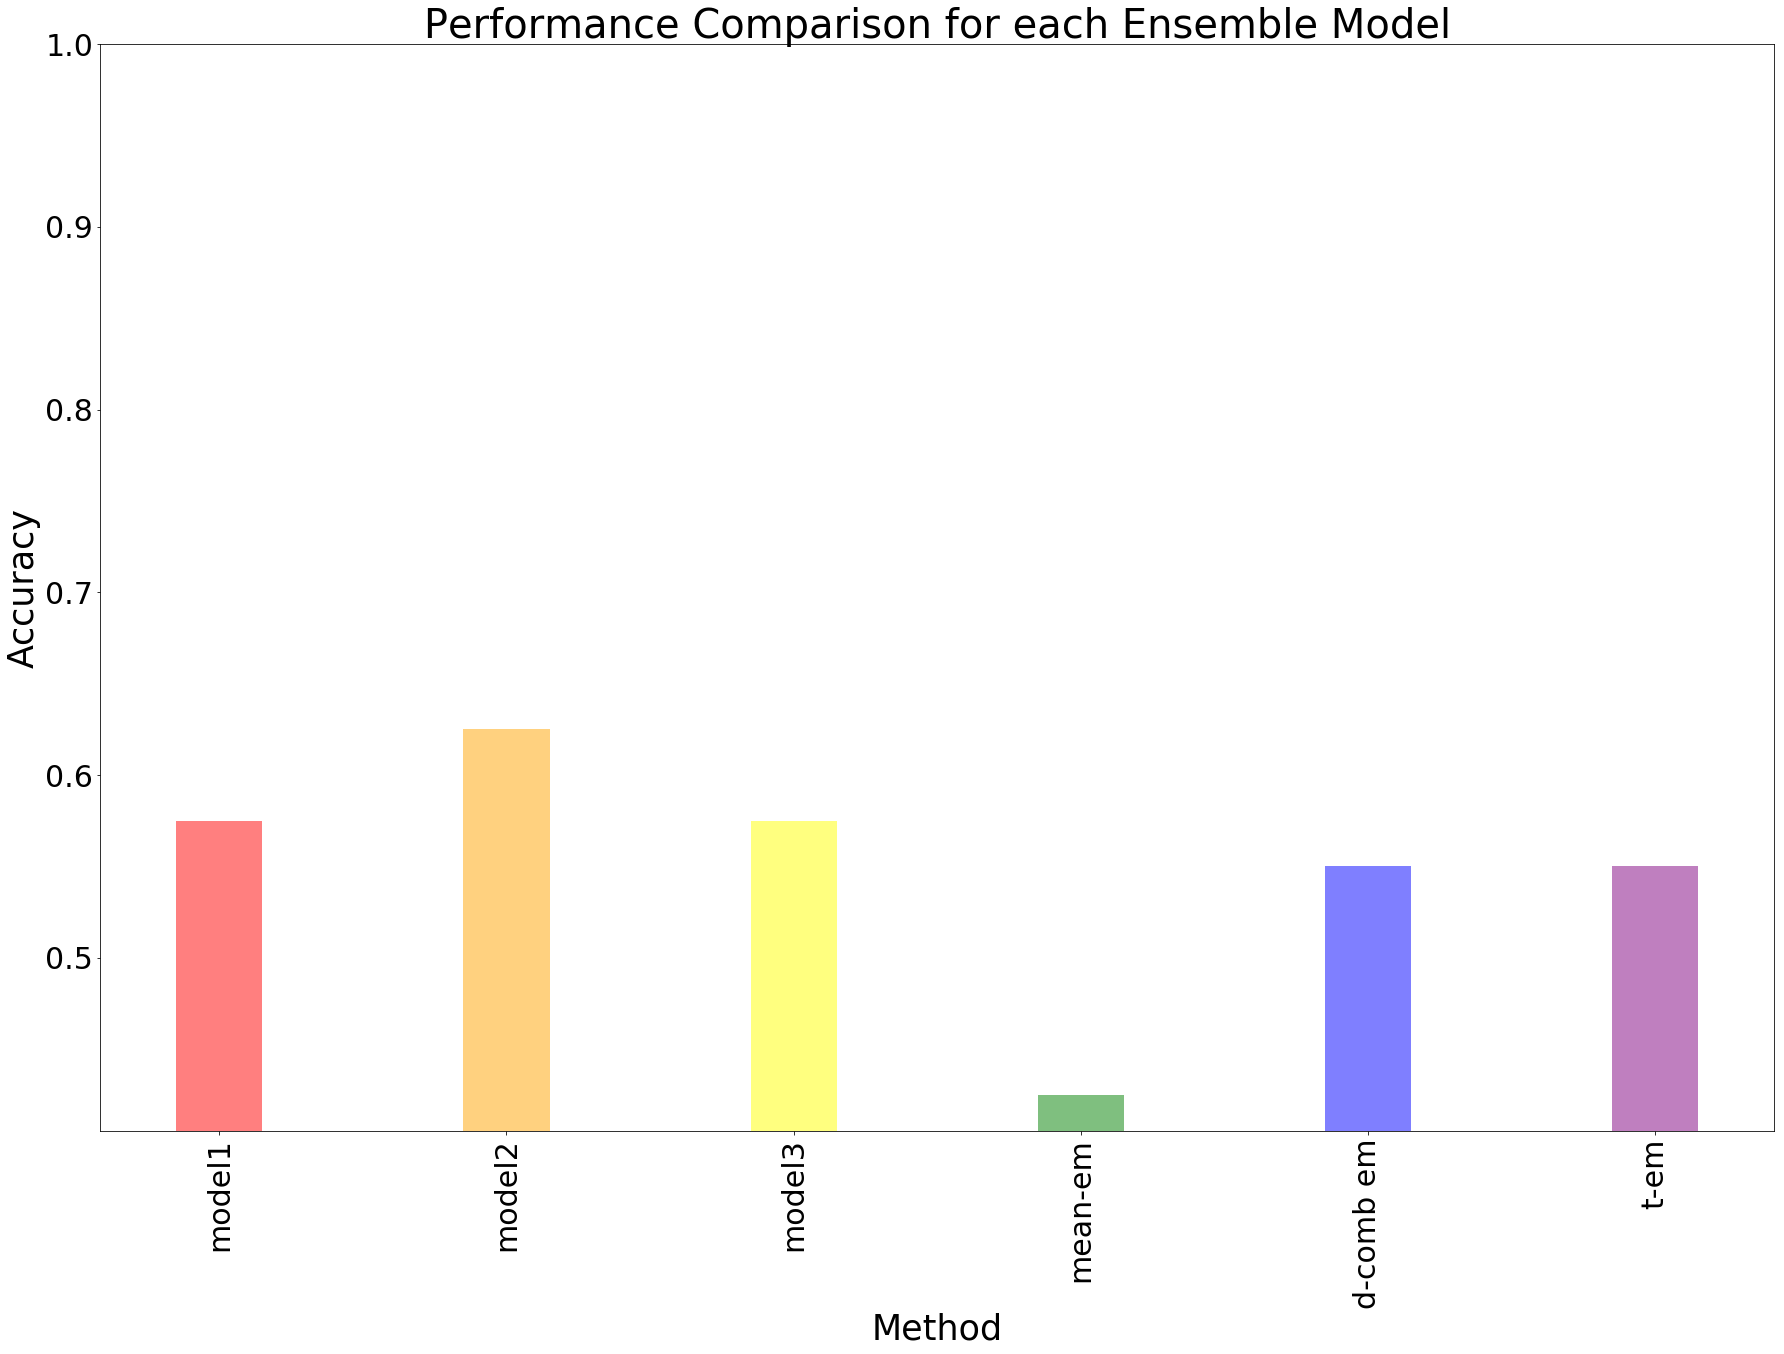

In [23]:
plot_bar_x()